In [1]:
from joblib import dump, load
df = load('lymph_node.joblib')

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
img_data = []
for i in df['datas']:
    img = np.array(i).flatten()
    img_data.append(img)

In [5]:
len(img_data)

935

In [6]:
x_train, x_test, y_train, y_test = train_test_split(img_data, np.array(df['status']), test_size=0.2 )

In [8]:
reg = LogisticRegression()

In [9]:
reg.fit(x_train, y_train)

C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = reg.predict(x_test)

In [12]:
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

Percentage correct:  60.962566844919785


In [3]:
from sklearn.svm import SVC

In [14]:
model = SVC(C=1, kernel='poly',gamma='auto')

In [15]:
model.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [16]:
y_pred = model.predict(x_test)

In [17]:
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

Percentage correct:  68.44919786096257


In [4]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [8]:
rfc_b = RFC()

In [9]:
rfc_b.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
rfc_b.predict(x_test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0

In [11]:
y_pred = rfc_b.predict(x_test)

In [12]:
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

Percentage correct:  73.79679144385027


In [16]:
accuracy_score(y_test, y_pred) *100

75.40106951871658

In [17]:
dump(rfc_b, 'multispec_rfc.pickle')

['multispec_rfc.pickle']

In [17]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

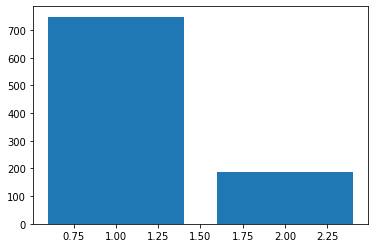

In [19]:
plt.bar([1,2], [len(x_train) ,len(x_test)])
plt.show

In [13]:
import cv2 as cv

In [15]:
img = cv.imread('train/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif')
pimg = np.array(img).flatten()
p = rfc_b.predict([pimg])

In [25]:
p

array(['1'], dtype='<U1')

In [29]:
p[0]

'1'

<function matplotlib.pyplot.show(close=None, block=None)>

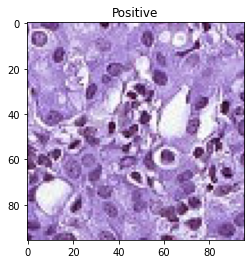

In [18]:
if p[0] == '1':
    x = 'Positive'
else:
    x = 'Negative'
plt.title(x)
plt.imshow(img)
plt.show

In [19]:
rfc = load('multispec_rfc.pickle')

In [20]:
rfc.predict([pimg])

array(['1'], dtype='<U1')